# MCL Frequency, bigram, trigram & more

In [84]:
import pandas as pd
import os
import numpy as np
import collections
import timeit
from matplotlib import pyplot as plt
import shelve
import collections 
from itertools import chain
import seaborn as sns

In [3]:
df = pd.read_csv(os.path.join("..", "data", "original_data", "tn.contig.filter.tsv"), sep="\t")
characteristics = pd.read_csv('../data/characteristics.csv')

In [37]:
characteristics.head()

,Unnamed: 0,origin,tokens,labels,length,num_TE,max_len_TE
0,0,100.fasta,"['mcl00578', 'mcl00294', 'mcl01096', 'mcl01000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5269,15,3
1,1,10000.fasta,"['mcl02431', 'mcl06548', 'mcl04067', 'mcl09083...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",123,0,0
2,2,10008.fasta,"['mcl0000X', 'mcl01971', 'mcl02107', 'mcl01276...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4346,6,4
3,3,10009.fasta,"['mcl09252', 'mcl09004', 'mcl11223', 'mcl09170...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",212,13,3
4,4,10013.fasta,"['mcl01241', 'mcl00150', 'mcl01386', 'mcl00603...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4221,7,19


In [78]:
# Flatten list

tokens = characteristics["tokens"].to_list()

tok_list = []
for tok in tokens:
    tok = tok.strip('][')
    tok = tok.replace("'", "")
    tok = tok.split(', ')
    tok_list.append(tok)

tok_list = [item for sublist in tok_list for item in sublist]

In [87]:
token_frequency = collections.Counter(tok_list)
freq_df = pd.DataFrame(data={'MCL Frequencies':token_frequency.values()})

<AxesSubplot:xlabel='MCL Frequencies', ylabel='Proportion'>

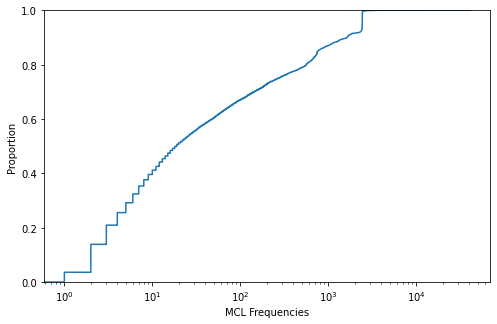

In [91]:
f, ax = plt.subplots(figsize=(8, 5))
ax.set(xscale="log")
sns.ecdfplot(data=freq_df, ax=ax, x="MCL Frequencies")